# Exploratory Data Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing necessary libraries & dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head(3)

,prod_id,ages,piece_count,set_name,prod_desc,prod_long_desc,theme_name,country,list_price,num_reviews,play_star_rating,review_difficulty,star_rating,val_star_rating
0,75823,6-12,-0.273020,Bird Island Egg Heist,Catapult into action and take back the eggs fr...,Use the staircase catapult to launch Red into ...,Angry Birds™,US,29.99,-0.398512,-0.655279,Average,-0.045687,-0.365010
1,75822,6-12,-0.404154,Piggy Plane Attack,Launch a flying attack and rescue the eggs fro...,Pilot Pig has taken off from Bird Island with ...,Angry Birds™,US,19.99,-0.398512,-0.655279,Easy,0.990651,-0.365010
2,75821,6-12,-0.517242,Piggy Car Escape,Chase the piggy with lightning-fast Chuck and ...,Pitch speedy bird Chuck against the Piggy Car....,Angry Birds™,US,12.99,-0.147162,-0.132473,Easy,-0.460222,-0.204063


In [4]:
#getting general statistics of our dataset
df.describe()

,prod_id,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating
count,1.087000e+04,1.087000e+04,10870.000000,1.087000e+04,1.087000e+04,1.087000e+04,1.087000e+04
mean,6.181634e+04,1.830285e-17,67.309137,1.372714e-17,1.011232e-15,-1.645622e-15,2.857369e-16
std,1.736390e+05,1.000000e+00,94.669414,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,6.300000e+02,-6.050659e-01,2.272400,-4.264402e-01,-5.883334e+00,-5.641909e+00,-5.193413e+00
25%,2.112300e+04,-4.895715e-01,21.899000,-3.705846e-01,-4.810100e-01,-4.602216e-01,-3.650101e-01
50%,4.207350e+04,-3.379852e-01,36.587800,-2.868011e-01,2.160641e-01,1.615809e-01,1.178302e-01
75%,7.124800e+04,6.263593e-02,73.187800,-1.192341e-01,5.646012e-01,7.833834e-01,6.006705e-01
max,2.000431e+06,8.466055e+00,1104.870000,9.795146e+00,1.087407e+00,9.906510e-01,1.244458e+00


AttributeError: 'SubplotSpec' object has no attribute 'is_first_col'

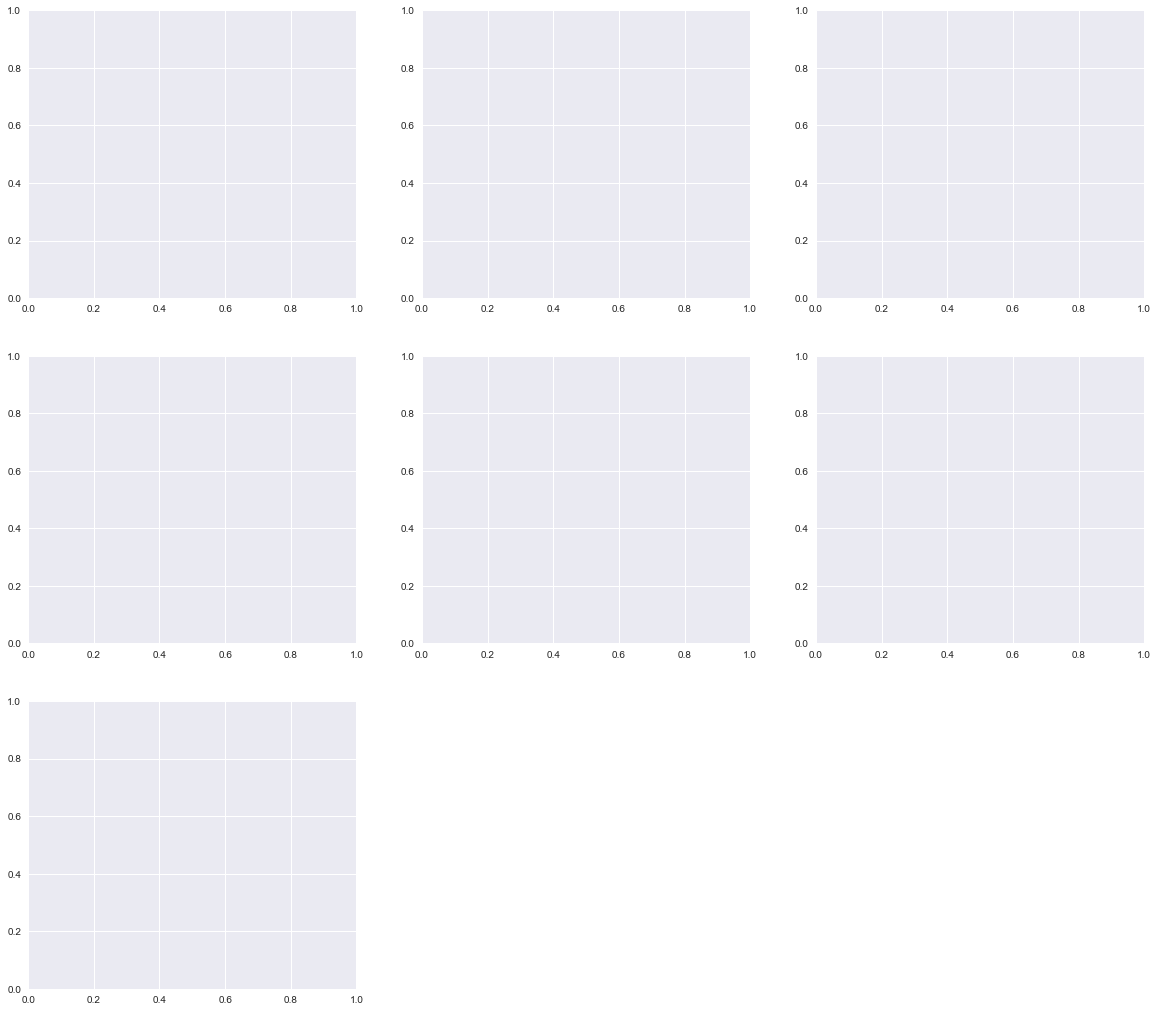

In [5]:
#ploting histograms of numeric variables
df.hist(figsize = (20,18));

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

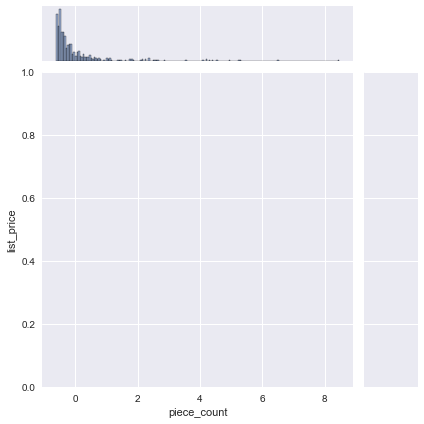

In [6]:
#Checking linearity
sns.jointplot('piece_count','list_price', data=df, kind='reg');

> **Comment: piece_count seems to have a linear relationship with list_price**

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

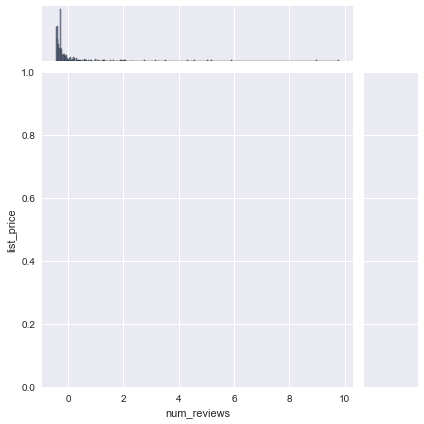

In [7]:
sns.jointplot('num_reviews','list_price', data=df, kind='reg');

> **Comment: There seems to be a some-what linear correlation between num_reviews and list_price. Though the relationship is noisier than what we saw with piece_count**

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

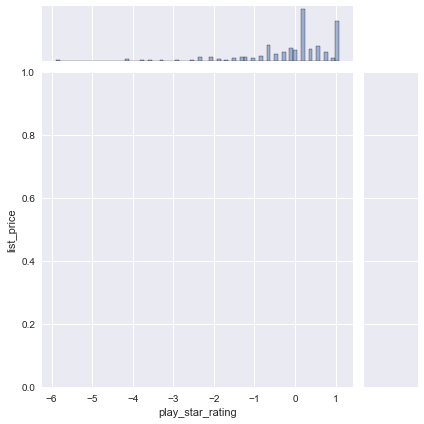

In [8]:
sns.jointplot('play_star_rating','list_price', data=df, kind='reg');

> **Comment: play_star_rating doesn't seem to have much of a linear relationship with list_price**

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

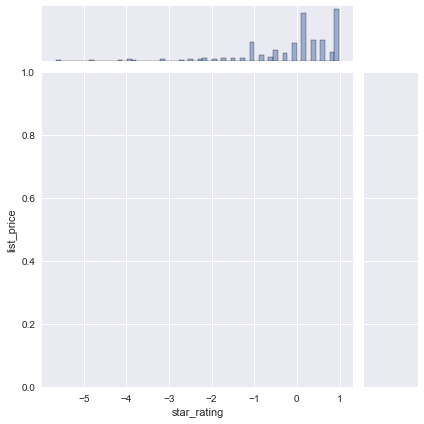

In [9]:
sns.jointplot('star_rating', 'list_price', data=df, kind='reg');

> **Comment: Again, little to no linear relation.**

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

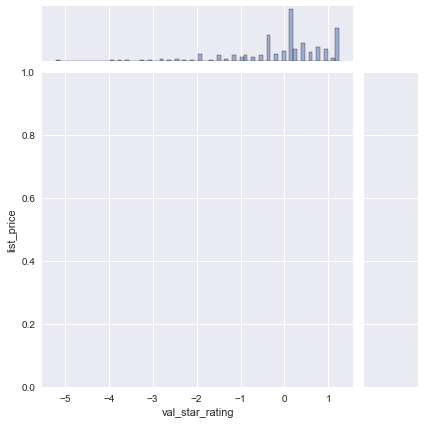

In [10]:
sns.jointplot("val_star_rating", "list_price", data=df, kind="reg");

> **Comment: Again, little to no linear relation**

**Well, at first look it appears that the previous efforts in order to fill in the null review values proved of little value. Perhaps this was due to imputing the mean, but as it currently stands, each of the rating features seems to have little to no predictive power for the upcoming model.**

#### Checking for Multicollinearity
It's also important to make note of whether your predictive features will result in multicollinearity in the resulting model. While definitive checks for multicollinearity require analyzing the resulting model, predictors with overly high pairwise-correlation (r > .65) are almost certain to produce multicollinearity in a model. With that, take a minute to generate the pairwise (pearson) correlation coefficients of your predictive features and visualize these coefficients as a heatmap.

In [11]:
feats = ['piece_count', 'num_reviews', 'play_star_rating','star_rating','val_star_rating']
corr = df[feats].corr()
corr

,piece_count,num_reviews,play_star_rating,star_rating,val_star_rating
piece_count,1.000000,0.548783,-0.023281,0.055481,0.057313
num_reviews,0.548783,1.000000,-0.070892,-0.002466,0.020471
play_star_rating,-0.023281,-0.070892,1.000000,0.619044,0.485843
star_rating,0.055481,-0.002466,0.619044,1.000000,0.728203
val_star_rating,0.057313,0.020471,0.485843,0.728203,1.000000


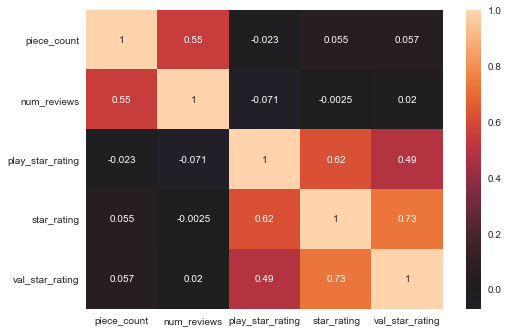

In [12]:
sns.heatmap(corr, center=0, annot=True);

In [13]:
# Comments: 
# The rating features show little promise for adding predictive power towards the `list_price`. 
# This diminishes worry concerning their high correlation. 
# That said, the two most promising predictors: `piece_count` and `num_reviews` also display fairly high correlation. 
# Further analysis of an initial model will clearly be warranted.